## Import Library

In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [187]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [188]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={"Luas Tanah (m2)": "Luas Tanah", "Luas Bangunan (m2)": "Luas Bangunan", "Tingkat/Lantai " : "Tingkat/Lantai",
                        "Harga Penawaran (dari Owner)":"Harga Penawaran", "Lebar Jalan Depan Rumah (ROW)" : "Lebar Jalan Depan"})
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [189]:
# describe data
df.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [190]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Area Category       308 non-null    object
 1   Nama Daerah         308 non-null    object
 2   Luas Tanah          308 non-null    int64 
 3   Luas Bangunan       308 non-null    int64 
 4   Jumlah Kamar        308 non-null    int64 
 5   Jumlah Kamar Mandi  308 non-null    int64 
 6   Tingkat/Lantai      308 non-null    int64 
 7   Harga Penawaran     308 non-null    int64 
 8   Terjual/Belum       308 non-null    object
 9   Arah Hadap Rumah    308 non-null    object
 10  Posisi Rumah        308 non-null    object
 11  Lebar Jalan Depan   308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


There isn't any null values

In [191]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Area Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Nama Daerah': array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
        'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
        'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat barat', 'Tambak Wedi',
        'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
        'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
        'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
        'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
        'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
        'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
        'Mulyosari Timur', 'Pakuwon City', 'Pakuwon city',
        'Pakuwon City Florence', 'Pantai Mentari', 'Royal Residence',
        'Villa Kalijudan Indah', 'Sutorejo Timur', 'Springville Residence',
        'Sukomanunggal', 'Surabaya Pusat', 'Su', 'Mulyosari',
  

In [192]:
# Check any duplicate values
df[df.duplicated(keep=False)]

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan
13,Standard,Gubeng,104,215,4,4,2,1350000000,Belum,Timur,Standard,1-2 Mobil
14,Standard,Gubeng,104,215,4,4,2,1350000000,Belum,Timur,Standard,1-2 Mobil
98,Standard,Sakura Regency Ketintang,134,200,7,2,2,2000000000,Belum,Utara,Standard,> 2 Mobil
110,Standard,Sakura Regency Ketintang,134,200,7,2,2,2000000000,Belum,Utara,Standard,> 2 Mobil
257,Premium,Citraland,210,325,6,5,2,4250000000,Belum,Selatan,Standard,> 2 Mobil
282,Premium,Citraland,210,325,6,5,2,4250000000,Belum,Selatan,Standard,> 2 Mobil


In [193]:
# Dropping duplicate values but keep 1 of the duplicate values
df = df.drop_duplicates(keep='first')

In [194]:
# drop Status Terjual karena datanya hanya 1
df = df.drop('Terjual/Belum', axis=1)
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan
0,Standard,Citraland,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil


In [195]:
# Now, separate numerical and categorical columns
numerical_cols = ['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai', 'Harga Penawaran']
categorical_cols = ['Area Category', 'Nama Daerah', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan']

print("Columns in df before selection:")
print(df.columns)

df_numerical = df[numerical_cols]
df_categorical = df[categorical_cols]

print("Numerical DataFrame head:")
print(df_numerical.head())
print("\nCategorical DataFrame head:")
print(df_categorical.head())

Columns in df before selection:
Index(['Area Category', 'Nama Daerah', 'Luas Tanah', 'Luas Bangunan',
       'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai',
       'Harga Penawaran', 'Arah Hadap Rumah', 'Posisi Rumah',
       'Lebar Jalan Depan'],
      dtype='object')
Numerical DataFrame head:
   Luas Tanah  Luas Bangunan  Jumlah Kamar  Jumlah Kamar Mandi  \
0         240            300             4                   3   
1          30             60             2                   1   
2         170            170             5                   4   
3         187            250             5                   5   
4         350            600             5                   5   

   Tingkat/Lantai  Harga Penawaran  
0               2       3500000000  
1               2        287799000  
2               2       2699999999  
3               2       3100000000  
4               2       5000000000  

Categorical DataFrame head:
    Area Category       Nama Daerah Arah Hadap R

**Reasoning**:
The next step is to encode the categorical features in `df_categorical` using `LabelEncoder` as specified in the main task, and then display the first five rows of the encoded DataFrame.



## Data Transformation

In [196]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. Ordinal Encoding
area_category_mapping = {'Below Standard': 0, 'Standard': 1, 'Premium': 2, 'Sangat Premium': 3}
df_categorical['Area Category'] = df_categorical['Area Category'].map(area_category_mapping)

lebar_jalan_depan_rumah_mapping = {'< 1 Mobil': 0, '1-2 Mobil': 1, '> 2 Mobil': 2}
df_categorical['Lebar Jalan Depan'] = df_categorical['Lebar Jalan Depan'].map(lebar_jalan_depan_rumah_mapping)

# 2. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['Nama Daerah', 'Arah Hadap Rumah', 'Posisi Rumah']
encoder = OrdinalEncoder()
df_categorical[nominal_cols] = encoder.fit_transform(df_categorical[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_categorical.sample(n = 5)

{'Arah Hadap Rumah': {'Barat': 0, 'Selatan': 1, 'Timur': 2, 'Utara': 3},
 'Nama Daerah': {'Anjasmoro': 0,
                 'Araya': 1,
                 'Asemrowo': 2,
                 'Babatan': 3,
                 'Babatan Pantai': 4,
                 'Baratajaya': 5,
                 'Bendul Merisi': 6,
                 'Bratang Gede': 7,
                 'Bubutan': 8,
                 'Bulak Cumpat barat': 9,
                 'Ciliwung': 10,
                 'Citraland': 11,
                 'Citraland ': 12,
                 'Citraland Golf Avenue': 13,
                 'Citraland Utara': 14,
                 'Darmahusada': 15,
                 'Darmo': 16,
                 'Darmo Permai': 17,
                 'Diponegoro': 18,
                 'Dukuh Pakis': 19,
                 'Dukuh Sutorejo': 20,
                 'Gading': 21,
                 'Gading Indah Regency': 22,
                 'Galaxy Bumi Permai': 23,
                 'Gayungan': 24,
                 'Gayungsari': 

/tmp/ipython-input-3018457263.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['Area Category'] = df_categorical['Area Category'].map(area_category_mapping)
/tmp/ipython-input-3018457263.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['Lebar Jalan Depan'] = df_categorical['Lebar Jalan Depan'].map(lebar_jalan_depan_rumah_mapping)
/tmp/ipython-input-3018457263.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,Area Category,Nama Daerah,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan
107,1,110.0,3.0,2.0,1
159,2,11.0,2.0,2.0,1
58,0,45.0,3.0,2.0,1
219,0,92.0,2.0,2.0,2
278,2,73.0,3.0,3.0,2


In [197]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[['Luas Tanah', 'Luas Bangunan', 'Harga Penawaran']])

df_scaled = pd.DataFrame(df_scaled, columns=['Luas Tanah', 'Luas Bangunan', 'Harga Penawaran'])
df_scaled.head()

,Luas Tanah,Luas Bangunan,Harga Penawaran
0,0.060732,0.154902,-0.184628
1,-0.977403,-0.967754,-0.570059
2,-0.285313,-0.453203,-0.280620
3,-0.201273,-0.078985,-0.232624
4,0.604517,1.558222,-0.004644


In [198]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah,Luas Bangunan,Harga Penawaran
count,3.050000e+02,3.050000e+02,3.050000e+02
mean,-2.329648e-17,4.076885e-17,5.096106e-17
std,1.001643e+00,1.001643e+00,1.001643e+00
min,-1.056499e+00,-1.182930e+00,-5.853933e-01
25%,-6.511317e-01,-6.870902e-01,-4.366063e-01
50%,-3.199173e-01,-3.128714e-01,-2.806200e-01
75%,3.177940e-01,3.420114e-01,-1.664307e-02
max,6.591094e+00,4.364863e+00,1.127437e+01


## Merge Numerical and Encoded Categorical DataFrames

In [199]:
df= pd.concat([df_numerical, df_categorical], axis=1)

print("Merged DataFrame head:")
display(df.head())

Merged DataFrame head:


,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Area Category,Nama Daerah,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan
0,240,300,4,3,2,3500000000,1,11.0,3.0,2.0,1
1,30,60,2,1,2,287799000,0,100.0,3.0,2.0,0
2,170,170,5,4,2,2699999999,1,48.0,1.0,0.0,1
3,187,250,5,5,2,3100000000,3,48.0,3.0,2.0,1
4,350,600,5,5,2,5000000000,2,48.0,0.0,2.0,1


## Silhouette Score

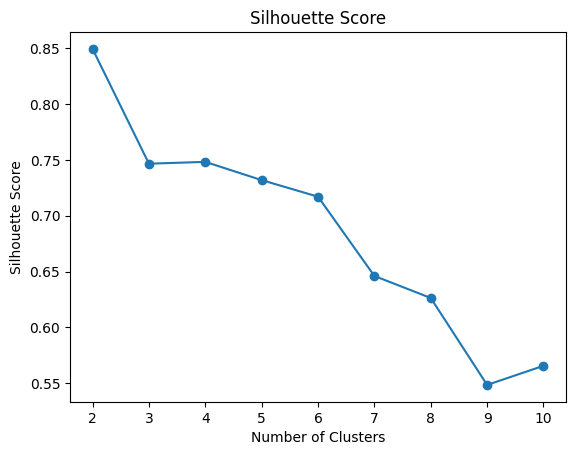

In [200]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

The best number of clusters for this dataset is 2

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


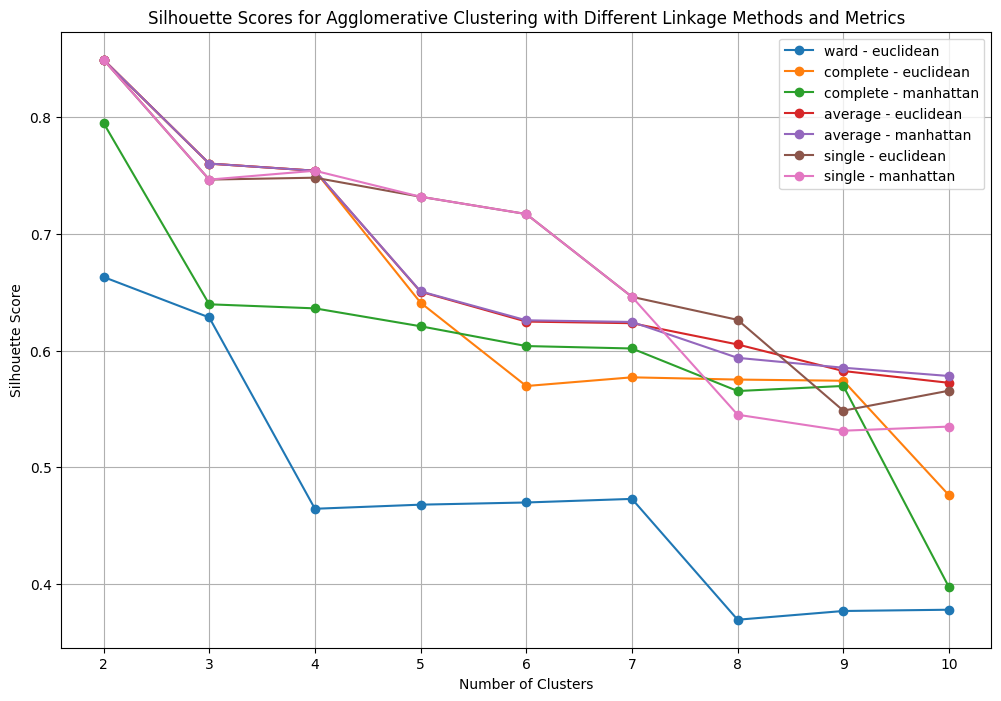

Best Silhouette Score: 0.8493551728395182
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [201]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported . karena ward gabisa pake manhattan, cuma bisa pake euclidean.
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")
# yg dipake addalah titik tertinggi di grafik (bisa 2)

From the graph and the printed output below it, the Best Silhouette Score found was approximately 0.849.
This score was achieved with 2 clusters.
The Optimal Linkage Method was 'complete'.
The Optimal Metric was 'euclidean'.

Conclusion:

A silhouette score of 0.849 is very high, indicating that the clustering is robust and the clusters are well-separated and distinct from each other. This is an excellent result.
The analysis suggests that dividing your dataset into 2 clusters using the complete linkage method with euclidean distance provides the most coherent and well-defined grouping of your data points. This implies there are two strong, underlying segments or categories within your property data based on the chosen features.

## Hierarchical Clustering Model

In [202]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = aggloWard.fit_predict(df_scaled)

In [203]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.6630692267201571


In [204]:
# Hierarchical Clustering for Ward
aggloWard = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric='euclidean')
y_hc_ward = aggloWard.fit_predict(df_scaled)

In [205]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc_ward)
print(ss)

0.6630692267201571


## Dendrogram Visualization for Hierarchical Clustering Model

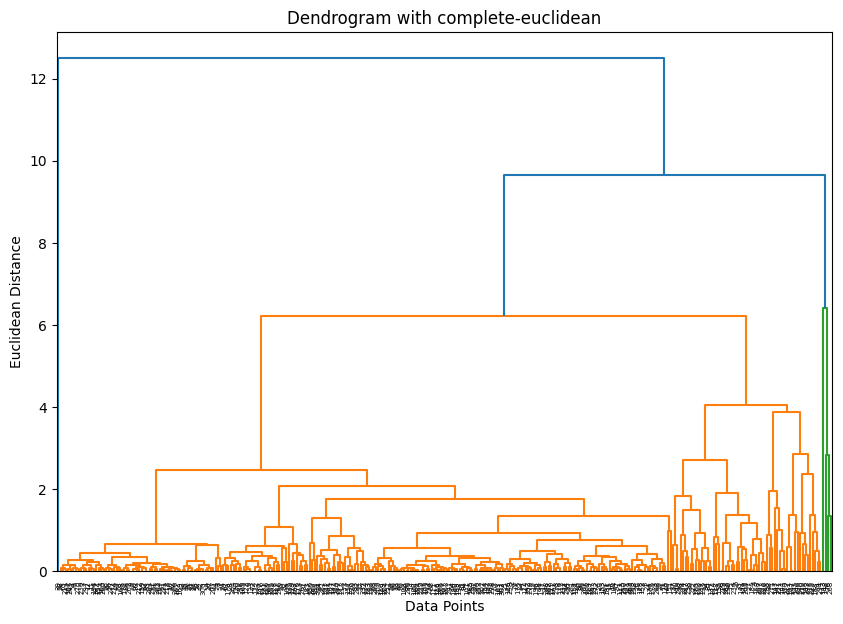

In [206]:
#Best
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

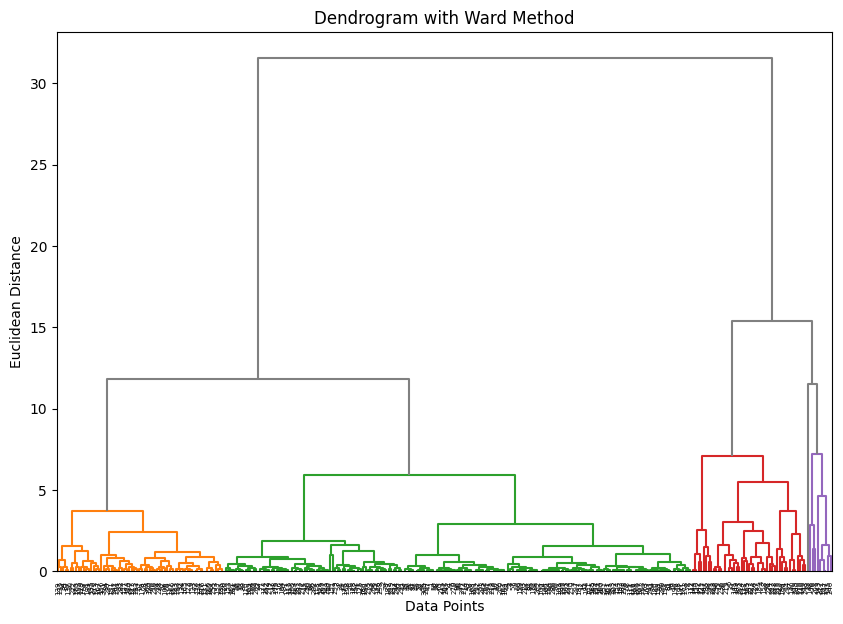

In [207]:
# Ward
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [208]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Area Category,Nama Daerah,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan,Agglo
0,240,300,4,3,2,3500000000,1,11.0,3.0,2.0,1,1
1,30,60,2,1,2,287799000,0,100.0,3.0,2.0,0,1
2,170,170,5,4,2,2699999999,1,48.0,1.0,0.0,1,1
3,187,250,5,5,2,3100000000,3,48.0,3.0,2.0,1,1
4,350,600,5,5,2,5000000000,2,48.0,0.0,2.0,1,0


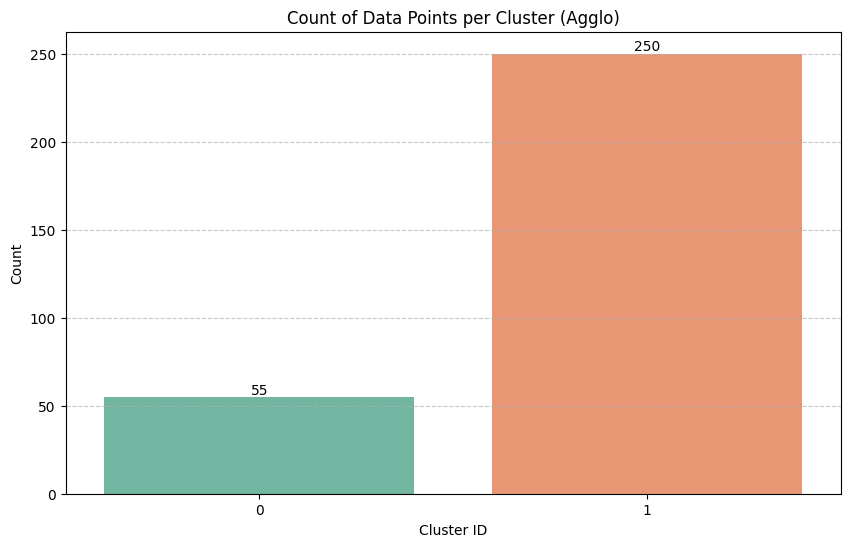

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The plot clearly indicates that Cluster 1 is significantly larger than Cluster 0. This means that a majority of the properties in your dataset fall into Cluster 1, while a smaller, but still substantial, portion belongs to Cluster 0.
This distribution is consistent with the scatter plot where we observed one cluster (Cluster 1, orange) covering a wider range of smaller land areas and lower prices, and another cluster (Cluster 0, blue) representing fewer properties but with larger land areas and higher prices.

In [210]:
# Add the cluster labels to the original data
df['Agglo_Ward'] = y_hc_ward

# Analyze the clusters with the original values
df.head()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Area Category,Nama Daerah,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan,Agglo,Agglo_Ward
0,240,300,4,3,2,3500000000,1,11.0,3.0,2.0,1,1,1
1,30,60,2,1,2,287799000,0,100.0,3.0,2.0,0,1,1
2,170,170,5,4,2,2699999999,1,48.0,1.0,0.0,1,1,1
3,187,250,5,5,2,3100000000,3,48.0,3.0,2.0,1,1,1
4,350,600,5,5,2,5000000000,2,48.0,0.0,2.0,1,0,0


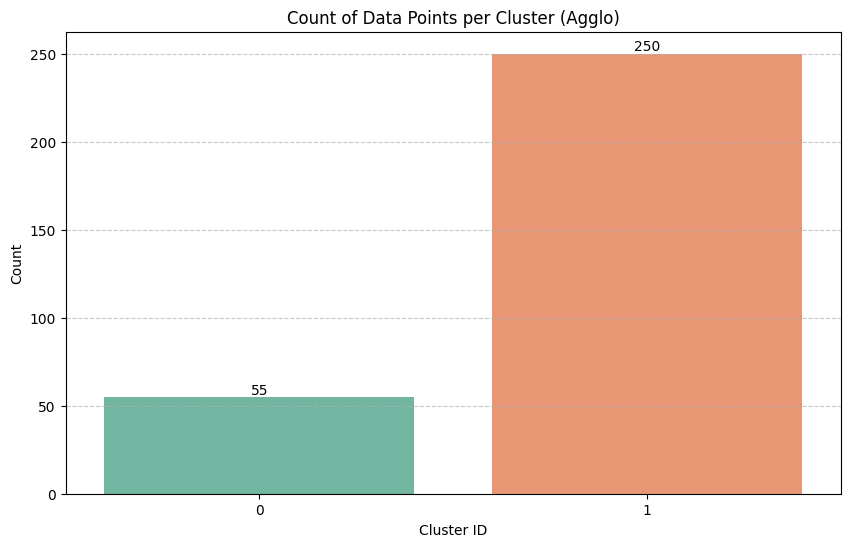

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo_Ward'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

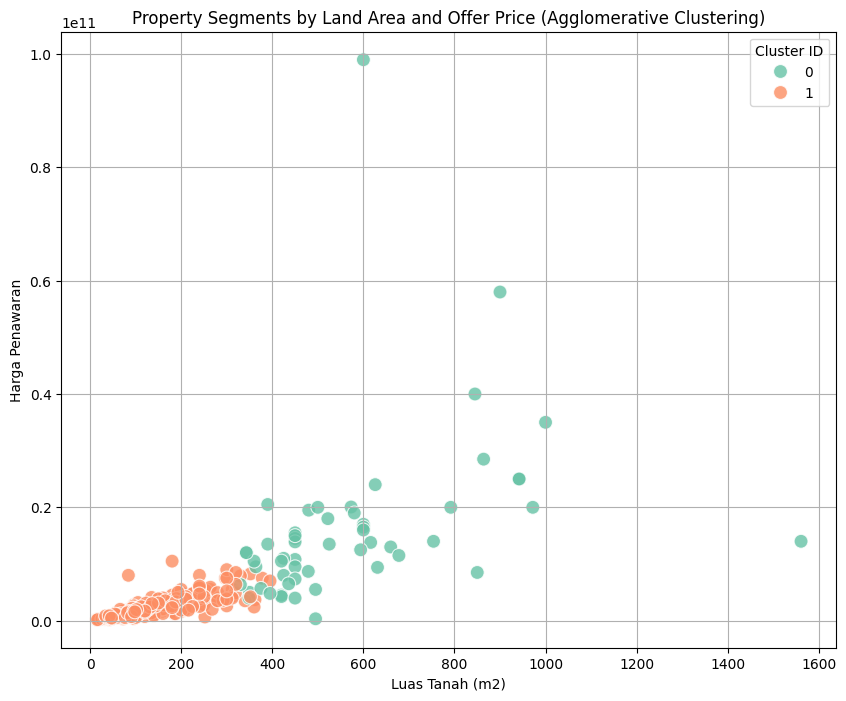

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Luas Tanah', y='Harga Penawaran', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Property Segments by Land Area and Offer Price (Agglomerative Clustering)')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Harga Penawaran')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

From this graph, we can observe two main clusters:

Cluster 0: Most properties in this cluster have a larger 'Luas Tanah' (Land Area) and tend to have a higher 'Harga Penawaran' (Offer Price). These data points form a group in the upper right portion of the graph, indicating premium or high-value properties.

Cluster 1: This cluster contains properties with a smaller 'Luas Tanah' (Land Area) and a lower 'Harga Penawaran' (Offer Price). These data points are concentrated in the lower left portion of the graph, indicating more affordable or entry-level properties.

This distribution visually confirms that the hierarchical clustering model successfully separated the properties into two distinct segments based on the combination of 'Luas Tanah' and 'Harga Penawaran'.

## Statistical Summary for each cluster

In [213]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_hc).agg({
    'Nama Daerah': ['first', 'count'],
    'Luas Tanah': ['mean', 'median'],
    'Luas Bangunan': ['mean', 'median'],
    'Jumlah Kamar': ['mean', 'median'],
    'Jumlah Kamar Mandi': ['mean', 'median'],
    'Tingkat/Lantai': ['mean', 'median'],
    'Area Category': ['first', 'count'],
    'Lebar Jalan Depan': ['first', 'count'],
    'Posisi Rumah': ['first', 'count'],
    'Arah Hadap Rumah': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Nama Daerah        Luas Tanah        Luas Bangunan         \
               mode count        mean median          mean median   
cluster                                                             
0              48.0    55  571.109091  495.0    623.709091  600.0   
1              11.0   250  152.168000  136.0    188.384000  170.0   

        Jumlah Kamar        Jumlah Kamar Mandi        Tingkat/Lantai         \
                mean median               mean median           mean median   
cluster                                                                       
0           5.890909    6.0           4.745455    5.0       1.927273    2.0   
1           3.904000    4.0           3.024000    3.0       1.820000    2.0   

        Area Category       Lebar Jalan Depan       Posisi Rumah        \
                 mode count              mode count         mode count   
cluster                                                                  
0                   2    55                 1    55          2.0    55   
1                   1   250                 1   250          2.0   250   

        Arah Hadap Rumah        
                    mode count  
cluster                         
0                    0.0    55  
1                    3.0   250

In [214]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_hc_ward).agg({
    'Nama Daerah': ['first', 'count'],
    'Luas Tanah': ['mean', 'median'],
    'Luas Bangunan': ['mean', 'median'],
    'Jumlah Kamar': ['mean', 'median'],
    'Jumlah Kamar Mandi': ['mean', 'median'],
    'Tingkat/Lantai': ['mean', 'median'],
    'Area Category': ['first', 'count'],
    'Lebar Jalan Depan': ['first', 'count'],
    'Posisi Rumah': ['first', 'count'],
    'Arah Hadap Rumah': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Nama Daerah        Luas Tanah        Luas Bangunan         \
               mode count        mean median          mean median   
cluster                                                             
0              48.0    55  571.109091  495.0    623.709091  600.0   
1              11.0   250  152.168000  136.0    188.384000  170.0   

        Jumlah Kamar        Jumlah Kamar Mandi        Tingkat/Lantai         \
                mean median               mean median           mean median   
cluster                                                                       
0           5.890909    6.0           4.745455    5.0       1.927273    2.0   
1           3.904000    4.0           3.024000    3.0       1.820000    2.0   

        Area Category       Lebar Jalan Depan       Posisi Rumah        \
                 mode count              mode count         mode count   
cluster                                                                  
0                   2    55                 1    55          2.0    55   
1                   1   250                 1   250          2.0   250   

        Arah Hadap Rumah        
                    mode count  
cluster                         
0                    0.0    55  
1                    3.0   250

## Comparison between two models

Based on the Silhouette Scores calculated previously:

*   **Ward Linkage**: Achieved a Silhouette Score of approximately `0.663`.
*   **Complete Linkage**: Achieved a Silhouette Score of approximately `0.849` (the best score identified).

**Interpretation and Conclusion**:

The higher Silhouette Score for **Complete Linkage (0.849)** indicates that it provides a significantly better and more meaningful segmentation compared to **Ward Linkage (0.663)**. A higher Silhouette Score suggests:

1.  **Better Separation**: Clusters are more distinctly separated from each other.
2.  **Higher Cohesion**: Data points within the same cluster are more similar to each other.

Looking at the **Distribution of Data Points per Cluster**:
*   Both Ward and Complete linkage methods result in a similar distribution of cluster sizes: one large cluster (around 250 properties) and one smaller cluster (around 55 properties). This consistency suggests that the inherent structure of two main segments is robust across these linkage methods.

Reviewing the **Cluster Mean/Median Values for Features**:
*   We can observe how the mean and median values for features like `Luas Tanah`, `Luas Bangunan`, and `Harga Penawaran` differ between Cluster 0 and Cluster 1 for both models.
*   For both Ward and Complete linkage, Cluster 0 consistently represents properties with significantly higher average `Luas Tanah`, `Luas Bangunan`, and `Harga Penawaran` compared to Cluster 1. This suggests that Cluster 0 generally captures premium/high-value properties, while Cluster 1 captures more standard/affordable properties.

While both methods identify similar high-level segments, the **Complete Linkage method** is quantitatively superior due to its higher Silhouette Score. This means that the boundaries between the clusters are sharper, and the data points within each cluster are more tightly grouped when using complete linkage with Euclidean distance. Therefore, for your dataset, **Complete Linkage provides a more robust and coherent clustering structure**, making its segmentation more meaningful for further analysis or decision-making.

## Managerial Interpretation and Business Implications of Property Market Segments

Berdasarkan hasil *Agglomerative Clustering* (dengan metode *Complete Linkage* yang optimal) yang mengidentifikasi dua klaster utama, kita dapat memahami segmen pasar properti dengan lebih baik dan merumuskan strategi bisnis yang relevan:

---

### **Klaster 0: Properti Premium/Nilai Tinggi (Cenderung memiliki Luas Tanah & Harga Penawaran Lebih Tinggi)**

*   **Profil Segmen**: Pembeli dengan daya beli tinggi yang mencari properti luas, mewah, dan seringkali berlokasi strategis atau eksklusif. Mereka mungkin memprioritaskan kualitas, desain, fasilitas, privasi, dan potensi investasi daripada sensitivitas harga.

*   **Implikasi Manajerial & Strategi Bisnis**:
    *   **Strategi Harga**: Terapkan harga premium yang mencerminkan nilai eksklusivitas, lokasi, kualitas material, dan fasilitas yang ditawarkan. Fokus pada *value proposition* dan potensi apresiasi investasi jangka panjang.
    *   **Pemasaran & Penjualan**: Gunakan saluran pemasaran yang ditargetkan untuk segmen berpenghasilan tinggi (misalnya, agen properti eksklusif, pameran properti mewah, publikasi gaya hidup, pemasaran digital yang sangat tersegmentasi). Tekankan pengalaman pribadi, layanan purna jual yang superior, dan program rujukan.
    *   **Penargetan Area**: Fokus pada pengembangan atau akuisisi properti di kawasan elit yang sudah mapan atau area berkembang yang diproyeksikan menjadi zona mewah.
    *   **Pengembangan Produk**: Prioritaskan kualitas konstruksi tinggi, desain arsitektur unik, fitur rumah pintar canggih, ruang terbuka hijau pribadi, dan fasilitas premium (kolam renang, area kebugaran, keamanan 24/7).

---

### **Klaster 1: Properti Standar/Terjangkau (Cenderung memiliki Luas Tanah & Harga Penawaran Lebih Rendah)**

*   **Profil Segmen**: Pembeli menengah ke bawah, pembeli rumah pertama, atau mereka yang mencari properti fungsional dengan harga kompetitif. Mereka lebih sensitif terhadap harga, biaya bulanan, dan aksesibilitas terhadap fasilitas dasar (transportasi, sekolah, pasar).

*   **Implikasi Manajerial & Strategi Bisnis**:
    *   **Strategi Harga**: Tawarkan harga yang kompetitif dan terjangkau. Pertimbangkan skema pembayaran fleksibel, kerja sama dengan bank untuk KPR, atau penawaran promosi (diskon, subsidi biaya).
    *   **Pemasaran & Penjualan**: Gunakan saluran pemasaran massal yang menjangkau luas (iklan online umum, media sosial, pameran properti berskala lebih besar). Tekankan keterjangkauan, fungsionalitas, lokasi yang strategis (dekat fasilitas umum), dan lingkungan komunitas.
    *   **Penargetan Area**: Fokus pada pengembangan di area residensial yang padat penduduk, kawasan suburban dengan akses transportasi yang baik, atau area yang sedang berkembang pesat dengan infrastruktur dasar yang memadai.
    *   **Pengembangan Produk**: Prioritaskan desain efisien, memaksimalkan penggunaan ruang, pembangunan multi-unit, dan fokus pada kebutuhan esensial. Pertimbangkan fitur-fitur yang meningkatkan nilai fungsional dengan biaya efektif.

---

### **Kesimpulan Pembelajaran Pasar Properti**:

*   **Segmentasi yang Jelas**: Pasar properti dapat secara efektif dibagi menjadi setidaknya dua segmen yang berbeda berdasarkan atribut fisik properti (luas tanah, luas bangunan) dan harga penawaran. Ini mengonfirmasi bahwa pendekatan *one-size-fits-all* tidak optimal.
*   **Strategi Terukur**: Setiap segmen memerlukan strategi yang disesuaikan di seluruh rantai nilai bisnis, mulai dari desain produk, penentuan harga, hingga saluran pemasaran dan penjualan.
*   **Optimalisasi Sumber Daya**: Dengan memahami karakteristik setiap segmen, perusahaan properti dapat mengoptimalkan alokasi sumber daya mereka, mengembangkan penawaran yang lebih relevan, dan berkomunikasi secara lebih efektif dengan calon pembeli. Hal ini pada akhirnya dapat meningkatkan penjualan, kepuasan pelanggan, dan profitabilitas.